# Analiza zmieniających się nastrojów i opinii dotyczących matury w latach 2021, 2022 i 2023 na podstawie danych z Twittera.

### Matura, będąca egzaminem końcowym w systemie edukacji, odgrywa kluczową rolę w życiu uczniów na całym świecie. Każdego roku tysiące uczniów poddaje się temu ważnemu testowi, który może mieć znaczący wpływ na ich przyszłość edukacyjną i zawodową.
### Celem tej pracy jest przeanalizowanie nastrojów i opinii użytkowników Twittera na temat matury w latach 2021, 2022 i 2023. Twitter jest popularną platformą społecznościową, na której ludzie publicznie wyrażają swoje myśli, emocje i opinie na różnorodne tematy. Wykorzystanie danych z Twittera umożliwi nam zrozumienie zmieniających się tendencji i trendów związanych z maturą na przestrzeni tych trzech lat.

    SCRAPPOWANIE DANYCH

W celu zbierania danych dotyczących matury, wybrałem hashtag #matura, #matura2021, itd. Hashtagi są popularnym narzędziem na Twitterze, które służą do kategoryzowania i oznaczania treści związanych z danym tematem. Wykorzystanie podanych hashtagów pozwoli nam zebrać tweety, które bezpośrednio odnoszą się do egzaminu maturalnego.

[program do pobierania tweetów (scraper)](Scraper.ipynb)

    PREPROCESSING

#### tokenizacja
Tokenizacja:
Tokenizacja jest procesem podziału tekstu na mniejsze jednostki zwane tokenami. Tokeny mogą być pojedynczymi słowami, znakami interpunkcyjnymi, fragmentami zdania itp. Tokenizacja jest ważnym krokiem w analizie tekstu, ponieważ pozwala na dalsze przetwarzanie i analizę tekstu na poziomie jednostek. Na przykład zdanie "To jest przykład tokenizacji." może zostać podzielone na tokeny: ["To", "jest", "przykład", "tokenizacji", "."].


#### lematyzacja
Lematyzacja to proces redukcji słów do ich podstawowej formy, zwanej lematem. Lemat to forma słowa, która reprezentuje ogólną bazową formę słowa. Na przykład lematem słowa "biegał", "bieganie" i "biegałem" jest "biegać". Lematyzacja ma na celu sprowadzenie różnych form słowa do jednej kanonicznej formy, co ułatwia analizę tekstu, ponieważ słowa o podobnym znaczeniu są traktowane jako jednostki. Lematyzacja może być realizowana za pomocą reguł lingwistycznych lub za pomocą zaawansowanych narzędzi do przetwarzania języka naturalnego (NLP)

#### stopwords
Stopwords to często występujące słowa, które nie niosą dużo znaczenia w analizie tekstu, takie jak "a", "i", "w", "na", "z". Zwykle są to powszechne słowa funkcyjne, które nie wniosą wiele informacji semantycznej. W celu usunięcia stopwords, możemy skorzystać z gotowych list takich słów lub wykorzystać biblioteki do analizy tekstu, które oferują taką funkcjonalność. Usunięcie stopwords pozwala skoncentrować się na bardziej znaczących słowach w analizowanym tekście.

In [57]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json

In [58]:
import spacy
nlp = spacy.load("pl_core_news_sm")
import pl_core_news_sm
nlp = pl_core_news_sm.load()

In [59]:
m1 = json.load(open('matura21.json', 'r'))
m2 = json.load(open('matura22.json', 'r'))
m3 = json.load(open('matura23.json', 'r'))

In [60]:
extended_stop_words = [" ","  ","   ",".", ",", ":", ";", "?", "!", "'", "’", "@", "n't", "(", ")", "#", "[", "]", "…", "...", "*", "'m", "'re", "'s", "'ve", "``", "''", "'ll", '"', "&", "|", "-", "”", "„", "“", "〝"]
def process_text(sentence):
    # Tokenizacja
    doc = nlp(sentence)
    # Lematyzacja i stopwords
    lemmas = [token.lemma_ for token in doc if not token.is_stop]
    # dodatkowe stopwords
    lemmas_filtered = [token for token in lemmas if token.lower() not in extended_stop_words]
    
    return lemmas_filtered

In [61]:
for tweet in m1:
    tweet['processed'] = process_text(tweet['content'])
for tweet in m2:
    tweet['processed'] = process_text(tweet['content'])
for tweet in m3:
    tweet['processed'] = process_text(tweet['content'])


    DODANIE PÓL Z OCENĄ EMOCJI

In [63]:
import text2emotion as te
from deep_translator import GoogleTranslator

In [69]:
# translate
def traslate_tweets(tweets):
    i = 0
    for tweet in tweets:
        tweet['translated'] = GoogleTranslator(source='auto', target='en').translate(tweet['content'])
        i += 1
        print(i/100000 * 100 , "%")
    return tweets


In [70]:
translated_tweets = traslate_tweets(m1)
translated_tweets = traslate_tweets(m2)
translated_tweets = traslate_tweets(m3)

0.001 %
0.002 %
0.003 %
0.004 %
0.005 %
0.006 %
0.006999999999999999 %
0.008 %
0.009000000000000001 %
0.01 %
0.011000000000000001 %
0.012 %
0.013 %
0.013999999999999999 %
0.015 %
0.016 %
0.017 %
0.018000000000000002 %
0.019 %
0.02 %
0.021 %
0.022000000000000002 %
0.023 %
0.024 %
0.025 %
0.026 %
0.027 %
0.027999999999999997 %
0.029 %
0.03 %
0.031 %
0.032 %
0.033 %
0.034 %
0.034999999999999996 %
0.036000000000000004 %
0.037 %
0.038 %
0.039 %
0.04 %
0.041 %
0.042 %
0.043 %
0.044000000000000004 %
0.045 %
0.046 %
0.047 %
0.048 %
0.049 %
0.05 %
0.051000000000000004 %
0.052 %
0.053 %
0.054 %
0.055 %
0.055999999999999994 %
0.056999999999999995 %
0.058 %
0.059000000000000004 %
0.06 %
0.061 %
0.062 %
0.063 %
0.064 %
0.065 %
0.066 %
0.067 %
0.068 %
0.06899999999999999 %
0.06999999999999999 %
0.07100000000000001 %
0.07200000000000001 %
0.073 %
0.074 %
0.075 %
0.076 %
0.077 %
0.078 %
0.079 %
0.08 %
0.08099999999999999 %
0.082 %
0.083 %
0.084 %
0.08499999999999999 %
0.086 %
0.087 %
0.088000000000000

KeyboardInterrupt: 

In [64]:
def vaderScore(tweets):
    GTranslator = GoogleTranslator(source='auto', target='en')
    vader = SentimentIntensityAnalyzer()
    arr = []
    for tweet in tweets:
        translated = GTranslator.translate(tweet["content"])
        score = vader.polarity_scores(translated)
        tweet["vader_score"] = score
        arr.append(tweet)
    return arr


def text2emotionScore(tweets):
    GTranslator = GoogleTranslator(source='auto', target='en')
    arr = []
    for tweet in tweets:
        translated = GTranslator.translate(tweet["content"])
        score = te.get_emotion(translated)
        tweet["t2e_score"] = score
        arr.append(tweet)
    return arr

In [65]:
vaderScore(m1)
# vaderScore(m2)
# vaderScore(m3)

# text2emotionScore(m1)
# text2emotionScore(m2)
# text2emotionScore(m3)

KeyboardInterrupt: 

In [27]:
json_m1 = json.dumps(m1, ensure_ascii=False )
file = open("matura21.json", "w")
file.write(json_m1)
file.close()

json_m2 = json.dumps(m2, ensure_ascii=False)
file = open("matura22.json", "w")
file.write(json_m2)
file.close()

json_m3 = json.dumps(m3, ensure_ascii=False )
file = open("matura23.json", "w")
file.write(json_m3)
file.close()

    WORDCLOUDY

In [28]:
m1_tweets = []
m2_tweets = []
m3_tweets = []

for tweet in m1:
    for word in tweet['processed']:
        m1_tweets.append(word)
for tweet in m2:
    for word in tweet['processed']:
        m2_tweets.append(word)
for tweet in m3:
    for word in tweet['processed']:
        m3_tweets.append(word)
        
m1_tweets = nltk.FreqDist(m1_tweets)
m2_tweets = nltk.FreqDist(m2_tweets)
m3_tweets = nltk.FreqDist(m3_tweets)


In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

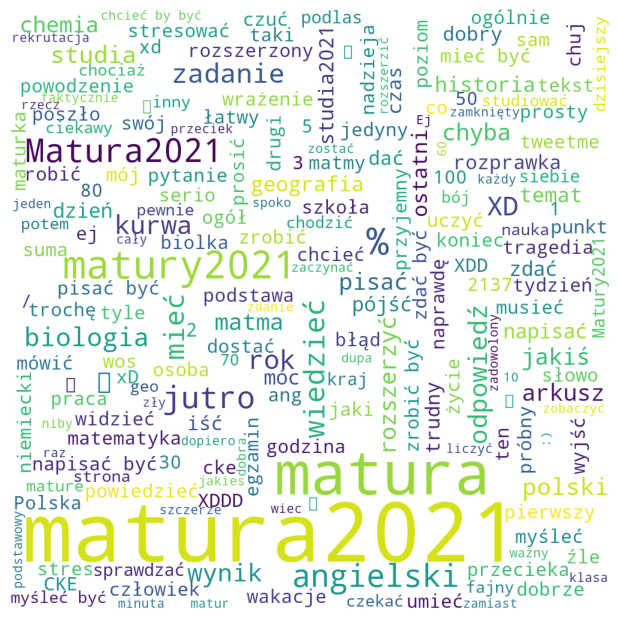

In [30]:

word_cloud = WordCloud(width=1000, height=1000,
                       background_color='white', min_font_size=10).generate_from_frequencies(m1_tweets)

plt.figure(figsize=(6,6), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

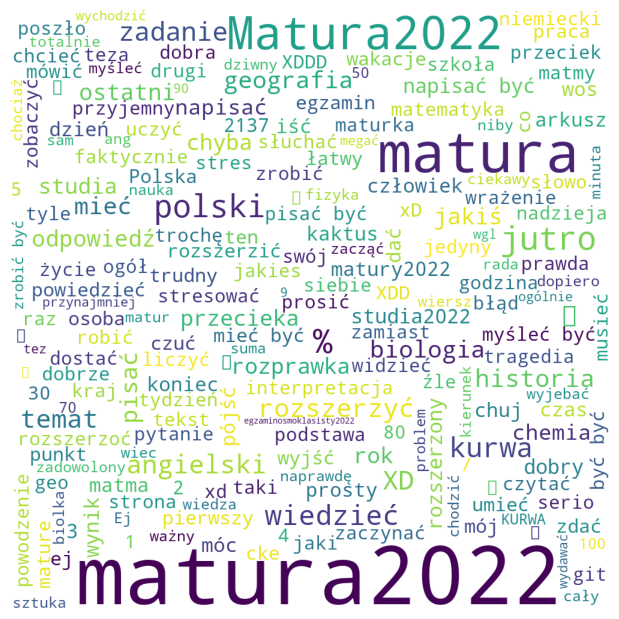

In [31]:
word_cloud = WordCloud(width=1000, height=1000,
                       background_color='white', min_font_size=10).generate_from_frequencies(m2_tweets)

plt.figure(figsize=(6,6), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

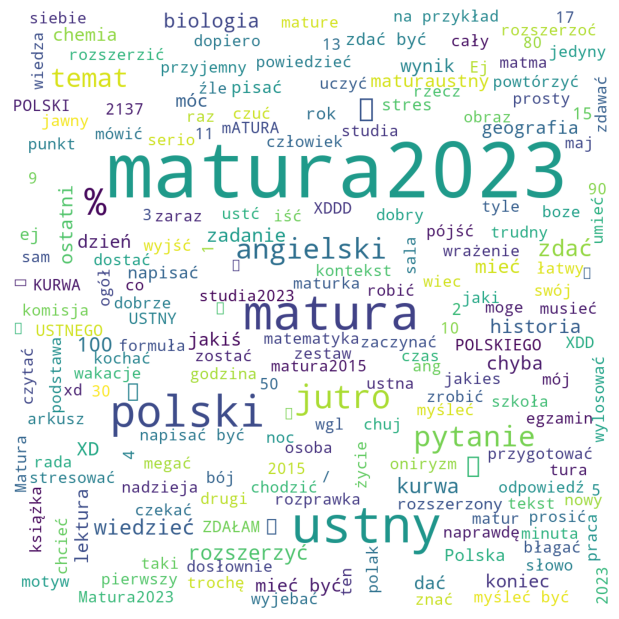

In [32]:
word_cloud = WordCloud(width=1000, height=1000,
                       background_color='white', min_font_size=10).generate_from_frequencies(m3_tweets)

plt.figure(figsize=(6,6), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

    PODZIAŁ NA POZYTYWNE I NEGATYWNE

In [71]:
m1_positives = []
m1_negatives = []
m1_neutrals = []

m2_positives = []
m2_negatives = []
m2_neutrals = []

m3_positives = []
m3_negatives = []
m3_neutrals = []

for tweet in m1:
    if tweet['vader_score']['compound'] >= 0.05:
        m1_positives.append(tweet)
    elif tweet['vader_score']['compound'] <= -0.05:
        m1_negatives.append(tweet)
    else:
        m1_neutrals.append(tweet)
        
for tweet in m2:
    if tweet['vader_score']['compound'] >= 0.05:
        m2_positives.append(tweet)
    elif tweet['vader_score']['compound'] <= -0.05:
        m2_negatives.append(tweet)
    else:
        m2_neutrals.append(tweet)
        
for tweet in m3:
    if tweet['vader_score']['compound'] >= 0.05:
        m3_positives.append(tweet)
    elif tweet['vader_score']['compound'] <= -0.05:
        m3_negatives.append(tweet)
    else:
        m3_neutrals.append(tweet)
        

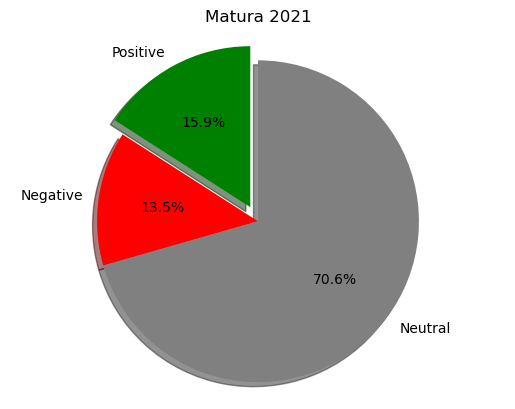

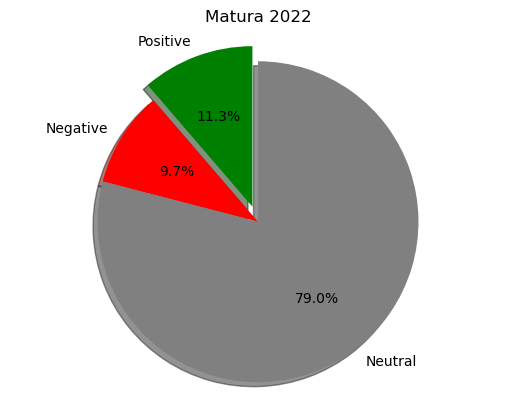

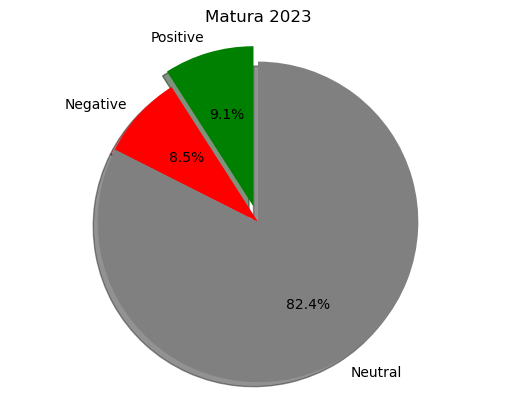

In [89]:
# m1
labels = ['Positive', 'Negative', 'Neutral']
sizes = [len(m1_positives), len(m1_negatives), len(m1_neutrals)]
colors = ['green', 'red', 'grey']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Matura 2021')
plt.show()

# m2
labels = ['Positive', 'Negative', 'Neutral']
sizes = [len(m2_positives), len(m2_negatives), len(m2_neutrals)]
colors = ['green', 'red', 'grey']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Matura 2022')
plt.show()

# m3
labels = ['Positive', 'Negative', 'Neutral']
sizes = [len(m3_positives), len(m3_negatives), len(m3_neutrals)]
colors = ['green', 'red', 'grey']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Matura 2023')
plt.show()



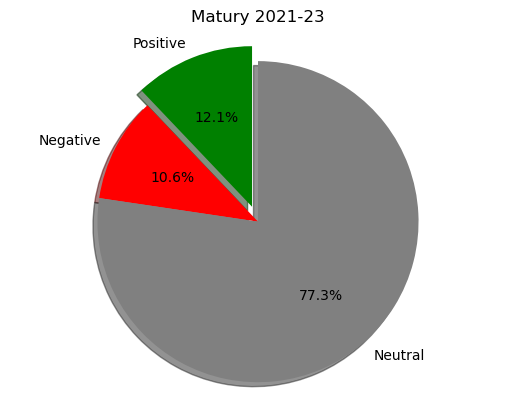

In [90]:
m_positives = m1_positives + m2_positives + m3_positives
m_negatives = m1_negatives + m2_negatives + m3_negatives
m_neutrals = m1_neutrals + m2_neutrals + m3_neutrals

# m
labels = ['Positive', 'Negative', 'Neutral']
sizes = [len(m_positives), len(m_negatives), len(m_neutrals)]
colors = ['green', 'red', 'grey']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Matury 2021-23')
plt.show()

    OPINIE A EMOCJE

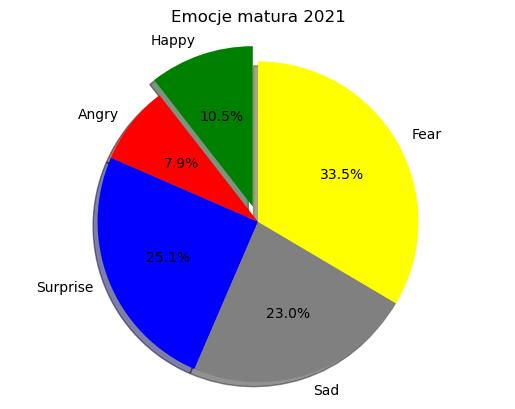

In [95]:
happy = []
angry = []
surprise = []
sad = []
fear = []

for tweet in m1:
    emotions = tweet['t2e_score']
    happy.append(emotions['Happy'])
    angry.append(emotions['Angry'])
    surprise.append(emotions['Surprise'])
    sad.append(emotions['Sad'])
    fear.append(emotions['Fear'])
    
happy = sum(happy) / len(happy)
angry = sum(angry) / len(angry)
surprise = sum(surprise) / len(surprise)
sad = sum(sad) / len(sad)
fear = sum(fear) / len(fear)


labels = ['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']
sizes = [happy, angry, surprise, sad, fear]
colors = ['green', 'red', 'blue', 'grey', 'yellow']
explode = (0.1, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Emocje matura 2021")
plt.show()

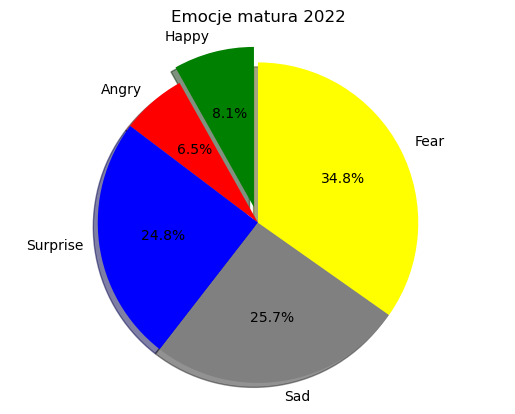

In [98]:
happy = []
angry = []
surprise = []
sad = []
fear = []

for tweet in m2:
    emotions = tweet['t2e_score']
    happy.append(emotions['Happy'])
    angry.append(emotions['Angry'])
    surprise.append(emotions['Surprise'])
    sad.append(emotions['Sad'])
    fear.append(emotions['Fear'])
    
happy = sum(happy) / len(happy)
angry = sum(angry) / len(angry)
surprise = sum(surprise) / len(surprise)
sad = sum(sad) / len(sad)
fear = sum(fear) / len(fear)


labels = ['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']
sizes = [happy, angry, surprise, sad, fear]
colors = ['green', 'red', 'blue', 'grey', 'yellow']
explode = (0.1, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Emocje matura 2022")
plt.show()

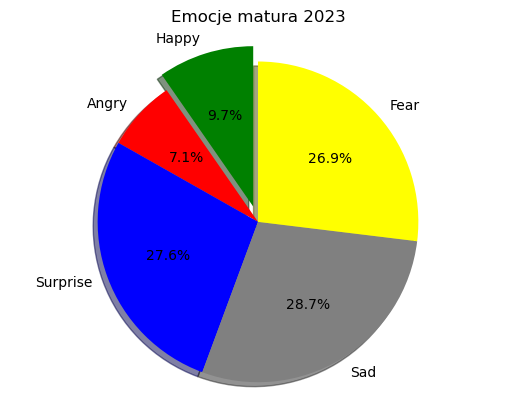

In [99]:
happy = []
angry = []
surprise = []
sad = []
fear = []

for tweet in m3:
    emotions = tweet['t2e_score']
    happy.append(emotions['Happy'])
    angry.append(emotions['Angry'])
    surprise.append(emotions['Surprise'])
    sad.append(emotions['Sad'])
    fear.append(emotions['Fear'])
    
happy = sum(happy) / len(happy)
angry = sum(angry) / len(angry)
surprise = sum(surprise) / len(surprise)
sad = sum(sad) / len(sad)
fear = sum(fear) / len(fear)


labels = ['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']
sizes = [happy, angry, surprise, sad, fear]
colors = ['green', 'red', 'blue', 'grey', 'yellow']
explode = (0.1, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Emocje matura 2023")
plt.show()

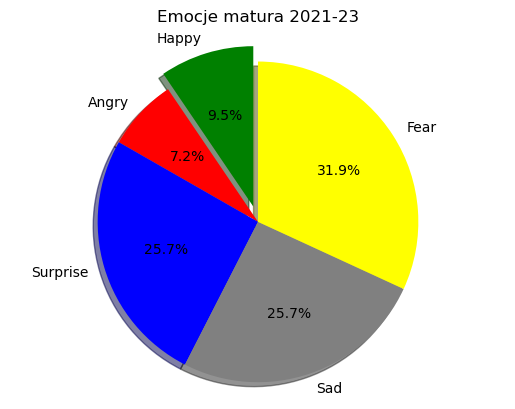

In [101]:
happy = []
angry = []
surprise = []
sad = []
fear = []

for tweet in m1:
    emotions = tweet['t2e_score']
    happy.append(emotions['Happy'])
    angry.append(emotions['Angry'])
    surprise.append(emotions['Surprise'])
    sad.append(emotions['Sad'])
    fear.append(emotions['Fear'])

for tweet in m2:
    emotions = tweet['t2e_score']
    happy.append(emotions['Happy'])
    angry.append(emotions['Angry'])
    surprise.append(emotions['Surprise'])
    sad.append(emotions['Sad'])
    fear.append(emotions['Fear'])

for tweet in m3:
    emotions = tweet['t2e_score']
    happy.append(emotions['Happy'])
    angry.append(emotions['Angry'])
    surprise.append(emotions['Surprise'])
    sad.append(emotions['Sad'])
    fear.append(emotions['Fear'])
    
happy = sum(happy) / len(happy)
angry = sum(angry) / len(angry)
surprise = sum(surprise) / len(surprise)
sad = sum(sad) / len(sad)
fear = sum(fear) / len(fear)


labels = ['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']
sizes = [happy, angry, surprise, sad, fear]
colors = ['green', 'red', 'blue', 'grey', 'yellow']
explode = (0.1, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Emocje matura 2021-23")
plt.show()

    WORDCLOUDS DLA TWEETÓW PODZIELONYCH PRZEZ EMOCJE 

In [23]:
m_negatives_freq = []
m_positives_freq = []
m_neutrals_freq = []

for tweet in m_negatives:
    for word in tweet['processed']:
        m_negatives_freq.append(word)
for tweet in m_positives:
    for word in tweet['processed']:
        m_positives_freq.append(word)
for tweet in m_neutrals:
    for word in tweet['processed']:
        m_neutrals_freq.append(word)
        
m_negatives_freq = nltk.FreqDist(m_negatives_freq)
m_positives_freq = nltk.FreqDist(m_positives_freq)
m_neutrals_freq = nltk.FreqDist(m_neutrals_freq)

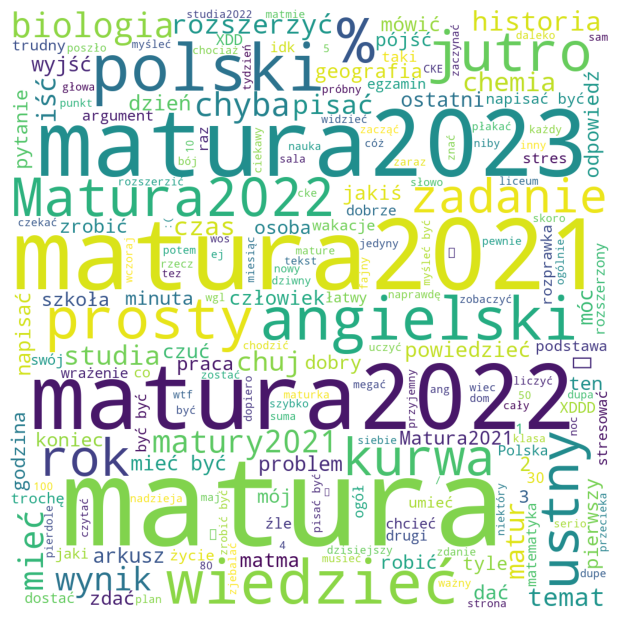

In [24]:
word_cloud = WordCloud(width=1000, height=1000,
                       background_color='white', min_font_size=10).generate_from_frequencies(m_negatives_freq)

plt.figure(figsize=(6,6), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

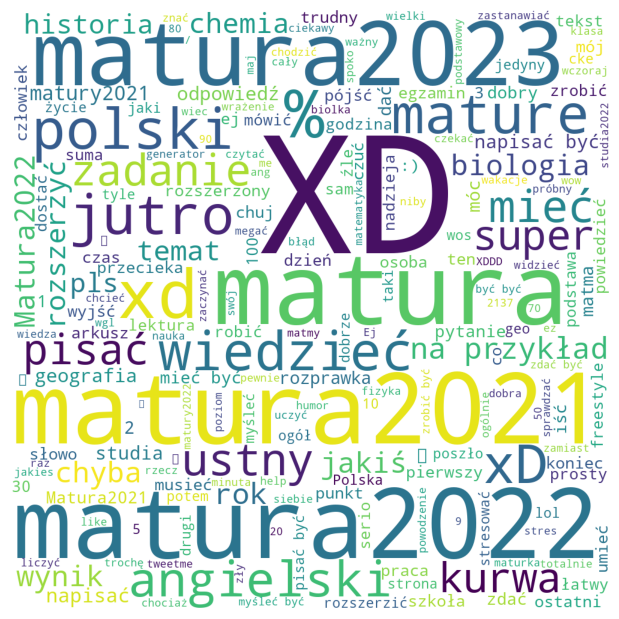

In [25]:
word_cloud = WordCloud(width=1000, height=1000,
                       background_color='white', min_font_size=10).generate_from_frequencies(m_positives_freq)

plt.figure(figsize=(6,6), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

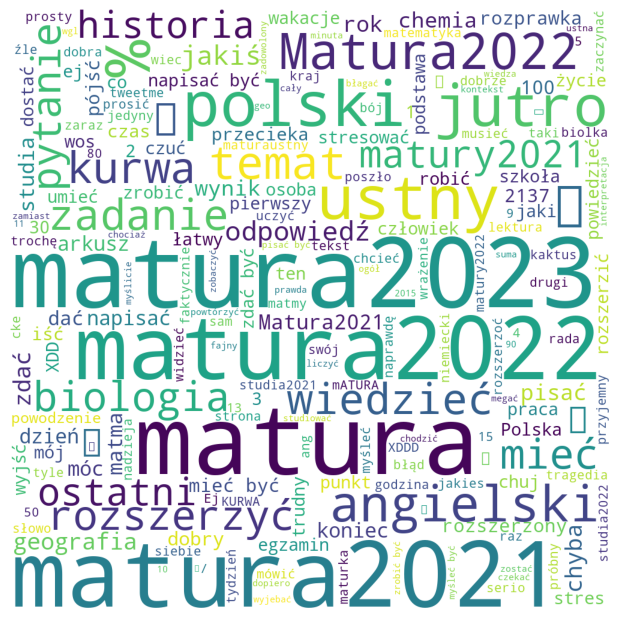

In [26]:
word_cloud = WordCloud(width=1000, height=1000,
                       background_color='white', min_font_size=10).generate_from_frequencies(m_neutrals_freq)

plt.figure(figsize=(6,6), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

    PODSUMOWANIE

Z analizy wykresów kołowych opinii widzimy, że z roku na rok spada ilość pozytywnych i negatywnych komentarzy na rzecz neutralnych. W przypadku konkretnych emocji widzimy, że maturzyści w okresie matur są wystraszeni, zaskoczeni i smutni co można połączyć z najczęściej występującymi słowami takimi jak "XD", "kurwa", "studia". Słowa "XD" i "kurwa" mogą być używane w celu zmniejszenia napięcia i złego samopoczucia związanego z egzaminami o których świadczy analiza emocji. 

